# **Trabajo de Grado**
#Maquinas Superficiales - Deteccion de Cancer de Prostata en Imagenes de Biopsias
<img style="float: right; padding-right: 10px;" height="220" src="https://drive.google.com/uc?id=0BzGoTc_BVojJUGJvMWRQVVllV0U"> <br>

**Estudiante:**<br>

**- Carlos Fernando Quintero Olaya**<br>
**- Jhonier Andres Vargas**<br>


**Universidad del Valle** <br>
**Escuela de Ingeniería Eléctrica y Electrónica** <br>
**Área de Informática Industrial** <br>

**Profesor:**Humberto Loaiza <br>

# Base datos y Librerias

In [1]:
# importar paquetes importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif



from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

np.random.seed(42)

#Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

dataset = "/content/drive/MyDrive/Color_GLCMLumenNuclei.txt"
data = pd.read_csv(dataset)
data = data.drop(["Image"], axis=1)
data.head(5)

Mounted at /content/drive


,R_Mean,R_Std,R_Varian,R_Skew,R_Kurt,G_Mean,G_Std,G_Varian,G_Skew,G_Kurt,...,Nuclei_Lumen_V_savgh,Nuclei_Lumen_V_svarh,Nuclei_Lumen_V_senth,Nuclei_Lumen_V_dvarh,Nuclei_Lumen_V_denth,Nuclei_Lumen_V_inf1h,Nuclei_Lumen_V_inf2h,Nuclei_Lumen_V_indnc,Nuclei_Lumen_V_idmnc,Grado
0,217.410172,33.368279,1113.442055,-1.738676,5.877003,176.863770,48.299277,2332.820159,-0.170855,2.511681,...,2.513763,7.331754,0.433933,0.439542,0.218553,-0.549658,0.549954,0.989244,0.994442,0
1,211.600597,34.984769,1223.934094,-1.717685,5.928267,163.169323,42.103685,1772.720261,-0.139069,3.589583,...,2.562871,7.584289,0.480288,0.487547,0.241033,-0.553145,0.578938,0.987989,0.993831,0
2,217.561749,26.125347,682.533749,-3.011066,13.430265,158.799992,41.874830,1753.501373,0.392726,3.295081,...,2.257569,5.412207,0.268375,0.197912,0.136858,-0.593304,0.469220,0.994638,0.997454,0
3,212.568054,36.947195,1365.095242,-1.616465,5.087505,166.004799,56.946019,3242.849132,0.095156,2.050753,...,2.593512,7.664100,0.502261,0.432172,0.247622,-0.571317,0.598362,0.988592,0.994478,0
4,213.758972,37.331551,1393.644694,-1.783654,5.613019,164.676800,52.069197,2711.201313,0.054361,2.501187,...,2.540786,7.149293,0.483554,0.392469,0.246458,-0.558479,0.582218,0.989151,0.994938,0


dividir los datos en características de entrada y de destino

In [3]:
X = data.drop("Grado", axis=1)
y = data["Grado"]

In [4]:
rd_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=rd_state)

# Seleccion de Características

## Embedded method: Random Forest

In [5]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 300, num = 1)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [30]
# Minimum number of samples required to split a node
min_samples_split = [10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2]
# Method of selecting samples for training each tree
bootstrap = [False]


param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_Model = RandomForestClassifier(random_state= rd_state)

FS_Model = make_pipeline(StandardScaler(),
                          GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4))

FS_Model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=4,
                              param_grid={'bootstrap': [False],
                                          'max_depth': [30],
                                          'max_features': ['auto'],
                                          'min_samples_leaf': [2],
                                          'min_samples_split': [10],
                                          'n_estimators': [300]},
                              verbose=2))])

In [6]:
FS_Model.named_steps['gridsearchcv'].best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [7]:
# Calcular la precisión del modelo
print("Precisión:", FS_Model.score(X_test,y_test))

Precisión: 0.665


In [8]:
FS_Model =  make_pipeline(StandardScaler(),
                          RandomForestClassifier(n_estimators = 300, max_features = 'auto', max_depth = 30,
                                                 min_samples_split = 10, min_samples_leaf = 2, bootstrap = False,
                                                 random_state= rd_state))

FS_Model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=30,
                                        max_features='auto', min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [9]:
print("Precisión:", FS_Model.score(X_test,y_test))

Precisión: 0.665


In [10]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": FS_Model.named_steps['randomforestclassifier'].feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
0,R_Mean,0.037128
1,R_Std,0.032246
4,R_Kurt,0.031061
8,G_Skew,0.027756
2,R_Varian,0.026044
...,...,...
84,Lumen_V_energ,0.002485
25,Lumen_maxpr,0.002456
132,Nuclei_Lumen_H_savgh,0.002416
169,Nuclei_Lumen_V_entro,0.002393


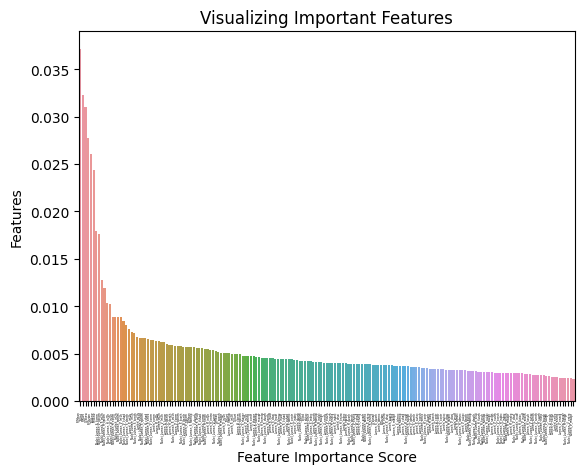

In [11]:
# visualizarcaracterísticas importantes

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=90, horizontalalignment="right", fontweight="light", fontsize="2"
)
plt.show()

In [12]:
# Filtrar las características importantes
selected_features = pd.DataFrame(feature_importances_df[:74])
selected_features

,feature,importance
0,R_Mean,0.037128
1,R_Std,0.032246
4,R_Kurt,0.031061
8,G_Skew,0.027756
2,R_Varian,0.026044
...,...,...
156,Nuclei_Lumen_S_dvarh,0.004523
50,Lumen_H_senth,0.004495
65,Lumen_S_invdf,0.004494
62,Lumen_S_dissi,0.004491


In [13]:
# Extraer los índices y almacenarlos en un vector
selected_indices = selected_features.index.tolist()
selected_indices = np.array(selected_features.index)

joblib.dump(selected_indices, "/content/drive/MyDrive/RF_Selected_Indices_74_features_py.joblib")

# Imprimir o hacer lo que necesites con el vector de índices
print(selected_indices)

[  0   1   4   8   2  13   3 143 165 159 123 138 137 122 117 102 179 166
 157  74 116 155  32 103 144 124 148 164  17  54  33 180  59  94  52 158
  80  18 154 136  81  10 150 177 149 145 101 134  53  43 163   5 152 130
  95  14  87  75   9  38  60 151  96 105  16 172  66 109  45 156  50  65
  62  44]


In [14]:
X_new = X.iloc[:, selected_indices]

X_new = X_new.to_numpy()

print(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y,stratify =y, test_size=0.2, random_state=rd_state)

[[2.17410172e+02 3.33682792e+01 5.87700320e+00 ... 9.88060327e-01
  2.38793465e-02 9.22167929e-01]
 [2.11600597e+02 3.49847695e+01 5.92826741e+00 ... 9.72230193e-01
  5.55396143e-02 9.25898137e-01]
 [2.17561749e+02 2.61253469e+01 1.34302655e+01 ... 9.83493638e-01
  3.30127230e-02 9.45729875e-01]
 ...
 [2.05015976e+02 3.56544539e+01 3.43914418e+00 ... 9.27775642e-01
  1.44448717e-01 8.89568747e-01]
 [1.96812546e+02 3.59570852e+01 2.93220457e+00 ... 9.22903041e-01
  1.54197106e-01 8.82988868e-01]
 [2.15968716e+02 3.59219730e+01 5.53793332e+00 ... 9.88132987e-01
  2.42571540e-02 9.13049706e-01]]


## Filter Based univariate selection: SelectKBest

In [ ]:
bestfeatures = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=74))
bestfeatures.fit(X_train,y_train)

feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": bestfeatures.named_steps['selectkbest'].scores_}).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
1,R_Std,566.057752
2,R_Varian,537.708752
0,R_Mean,446.944931
4,R_Kurt,349.349862
3,R_Skew,331.149262
...,...,...
99,Nuclei_Lumen_autoc,4.360592
89,Lumen_V_sosvh,4.205414
78,Lumen_V_autoc,4.013501
26,Lumen_sosvh,3.754229


In [ ]:
# Filtrar las características importantes
selected_features = pd.DataFrame(feature_importances_df[:74])
selected_features

,feature,importance
1,R_Std,566.057752
2,R_Varian,537.708752
0,R_Mean,446.944931
4,R_Kurt,349.349862
3,R_Skew,331.149262
...,...,...
41,Lumen_H_dissi,70.759762
18,Lumen_cprom,69.370529
124,Nuclei_Lumen_H_cshad,69.031506
150,Nuclei_Lumen_S_homop,68.921816


In [ ]:
# Extraer los índices y almacenarlos en un vector
selected_indices = selected_features.index.tolist()
selected_indices = np.array(selected_features.index)

joblib.dump(selected_indices, "/content/drive/MyDrive/SelectKBest_Selected_Indices_py.joblib")

# Imprimir o hacer lo que necesites con el vector de índices
print(selected_indices)

[  1   2   0   4   3   8  13 159 138 117 180 143 134 127 155 148  94 126
 147 136 168 105  95  86  87 141 145 157 153  32 165 151 113 172 130 109
 106 176 152  97  31  17 169  24  23  34 154  81  20 122  83  35 166  80
  85 144  30  16  98 164  51  37  92 123  56  79  93 149 132  41  18 124
 150 102]


In [ ]:
X_new = X.iloc[:, selected_indices]

X_new = X_new.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_new, y,stratify =y, test_size=0.2, random_state=rd_state)

## SelectFromModel: SVM

In [ ]:
svm = make_pipeline(StandardScaler(),
                    SVC(kernel='linear', C = 1.2,decision_function_shape='ovo', random_state = rd_state))

svm.fit(X_train, y_train)

# Acceder al clasificador SVM dentro del Pipeline
svm_classifier = svm.named_steps['svc']  # 'svc' es el nombre del paso del clasificador SVM en el pipeline

# Crear SelectFromModel con el clasificador SVM
model = SelectFromModel(svm_classifier, prefit=True)

# Obtener las características importantes y sus valores
selected_features = model.get_support()
feature_names = list(X_train.columns)

# Crear un DataFrame con índices y nombres de características seleccionadas
selected_indices = np.where(selected_features)[0]
selected_features = pd.DataFrame({'Feature_Name': [feature_names[i] for i in selected_indices]}, index=selected_indices)

# Mostrar el nuevo DataFrame
selected_features

,Feature_Name
0,R_Mean
3,R_Skew
4,R_Kurt
5,G_Mean
6,G_Std
...,...
169,Nuclei_Lumen_V_entro
176,Nuclei_Lumen_V_senth
179,Nuclei_Lumen_V_inf1h
180,Nuclei_Lumen_V_inf2h


In [ ]:
# Obtener los índices de las características seleccionadas
selected_indices = selected_features.index[:74]
joblib.dump(selected_indices, "/content/drive/MyDrive/SelectModel_SVM_Selected_Indices_74_features_py.joblib")
print(selected_indices)

# Seleccionar las características correspondientes en el conjunto de datos original X
X_new = X.iloc[:, selected_indices]

X_new = X_new.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_new, y,stratify =y, test_size=0.2, random_state=rd_state)

Int64Index([  0,   3,   4,   5,   6,   8,   9,  10,  13,  18,  23,  24,  28,
             29,  31,  32,  33,  42,  44,  45,  46,  50,  52,  53,  54,  60,
             61,  64,  67,  73,  74,  75,  80,  81,  84,  85,  92,  94,  96,
            101, 103, 105, 106, 116, 117, 122, 123, 124, 125, 126, 127, 128,
            129, 134, 136, 137, 138, 140, 143, 144, 147, 148, 155, 157, 158,
            159, 164, 165, 168, 169, 176, 179, 180, 182],
           dtype='int64')


## Recursive Feature Selection: SVM-RFE

In [ ]:
svm = SVC(kernel='linear', C = 1.2,decision_function_shape='ovo', random_state = rd_state)
min_features_to_select = 74
rfe_svm = make_pipeline(StandardScaler(),
                        RFE(estimator=svm, step=1, n_features_to_select = min_features_to_select))
rfe_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=SVC(C=1.2, decision_function_shape='ovo',
                                   kernel='linear', random_state=42),
                     n_features_to_select=74))])

In [ ]:
print(f"Optimal number of features: {rfe_svm.named_steps['rfe'].n_features_}")

# Después de ajustar el modelo
selected_features = rfe_svm.named_steps['rfe'].support_

# Índices de las características seleccionadas
selected_indices = np.where(selected_features)[0]

feature_names = list(X_train.columns)

selected_features = pd.DataFrame({'Feature_Name': [feature_names[i] for i in selected_indices]}, index=selected_indices)

# Imprimir resultados
selected_features

Optimal number of features: 74


,Feature_Name
0,R_Mean
3,R_Skew
4,R_Kurt
5,G_Mean
6,G_Std
...,...
169,Nuclei_Lumen_V_entro
176,Nuclei_Lumen_V_senth
179,Nuclei_Lumen_V_inf1h
180,Nuclei_Lumen_V_inf2h


In [ ]:
# Obtener los índices de las características seleccionadas
selected_indices = selected_features.index
joblib.dump(selected_indices, "/content/drive/MyDrive/RFE_SVM_Selected_Indices_74_features_py.joblib")
print(selected_indices)

# Seleccionar las características correspondientes en el conjunto de datos original X
X_new = X.iloc[:, selected_indices]

X_new = X_new.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_new, y,stratify =y, test_size=0.2, random_state=rd_state)

Int64Index([  0,   3,   4,   5,   6,   8,  10,  11,  12,  13,  18,  19,  23,
             28,  31,  32,  33,  42,  45,  46,  50,  52,  53,  54,  56,  64,
             67,  72,  73,  81,  84,  85,  96,  98,  99, 100, 101, 103, 105,
            106, 114, 116, 117, 118, 121, 122, 123, 124, 126, 127, 128, 129,
            134, 136, 137, 139, 140, 141, 143, 144, 147, 148, 155, 157, 158,
            159, 164, 165, 168, 169, 176, 179, 180, 182],
           dtype='int64')


# Entrenando Clasificadores

## Random Forest

In [15]:
RFModel =  make_pipeline(StandardScaler(),
                          RandomForestClassifier(n_estimators = 300, max_features = 'auto', max_depth = 30,
                                                 min_samples_split = 10, min_samples_leaf = 2, bootstrap = False,
                                                 random_state= rd_state))

RFModel.fit(X_train, y_train)

joblib.dump(RFModel, "/content/drive/MyDrive/RFModel_74_Features_RF_py.joblib")

['/content/drive/MyDrive/RFModel_74_Features_RF_py.joblib']

In [16]:
# predicción en el conjunto de prueba
y_pred_rf = RFModel.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred_rf))

Precisión: 0.67


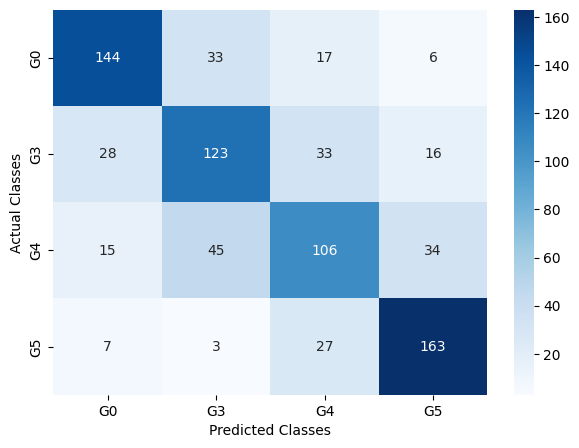

In [17]:
# Calcular la matriz de confusión
cm  = confusion_matrix(y_test, y_pred_rf)

class_labels = ['G0','G3','G4','G5']

# Modificar tamaño de la figura y el eje
fig, ax = plt.subplots(figsize=(7, 5))  # Tamaño de 6x6 pulgadas

sns.heatmap(cm, fmt='d' , annot=True, cmap='Blues',xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Ajustar las etiquetas de los ejes
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

# Mostrar el gráfico
plt.show()

In [18]:
# Obtener el informe de clasificación
report = classification_report(y_test, y_pred_rf, target_names= class_labels, digits=4)

print(report)

              precision    recall  f1-score   support

          G0     0.7423    0.7200    0.7310       200
          G3     0.6029    0.6150    0.6089       200
          G4     0.5792    0.5300    0.5535       200
          G5     0.7443    0.8150    0.7780       200

    accuracy                         0.6700       800
   macro avg     0.6672    0.6700    0.6679       800
weighted avg     0.6672    0.6700    0.6679       800



## SVM


In [19]:
SVMModelpy = make_pipeline(StandardScaler(),
                         SVC(kernel='linear', C = 100,decision_function_shape='ovo', random_state = rd_state))

SVMModelpy.fit(X_train, y_train)

joblib.dump(SVMModelpy, "/content/drive/MyDrive/SVMModel__74_Features_RF_py.joblib")

['/content/drive/MyDrive/SVMModel__74_Features_RF_py.joblib']

In [20]:
# predicción en el conjunto de prueba
y_pred_svm = SVMModelpy.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred_svm))

Precisión: 0.6825


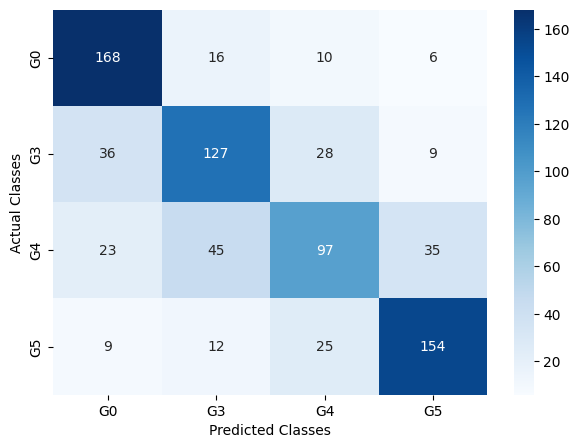

In [21]:
# Calcular la matriz de confusión
cm  = confusion_matrix(y_test, y_pred_svm)

class_labels = ['G0','G3','G4','G5']

# Modificar tamaño de la figura y el eje
fig, ax = plt.subplots(figsize=(7, 5))  # Tamaño de 6x6 pulgadas

sns.heatmap(cm, fmt='d' , annot=True, cmap='Blues',xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Ajustar las etiquetas de los ejes
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

# Mostrar el gráfico
plt.show()

In [22]:
# Obtener el informe de clasificación
report = classification_report(y_test, y_pred_svm, target_names= class_labels, digits=4)

print(report)

              precision    recall  f1-score   support

          G0     0.7119    0.8400    0.7706       200
          G3     0.6350    0.6350    0.6350       200
          G4     0.6062    0.4850    0.5389       200
          G5     0.7549    0.7700    0.7624       200

    accuracy                         0.6825       800
   macro avg     0.6770    0.6825    0.6767       800
weighted avg     0.6770    0.6825    0.6767       800



## MLP


In [23]:
MLPModel = make_pipeline(StandardScaler(),
                         MLPClassifier(hidden_layer_sizes=(292,),solver = 'adam', activation='relu', alpha=0.00303415,max_iter=400, random_state = rd_state))

MLPModel.fit(X_train, y_train)

joblib.dump(MLPModel, "/content/drive/MyDrive/MLPModel_74_Features_RF_py.joblib")

['/content/drive/MyDrive/MLPModel_74_Features_RF_py.joblib']

In [24]:
# predicción en el conjunto de prueba
y_pred_MLP = MLPModel.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred_MLP))

Precisión: 0.77125


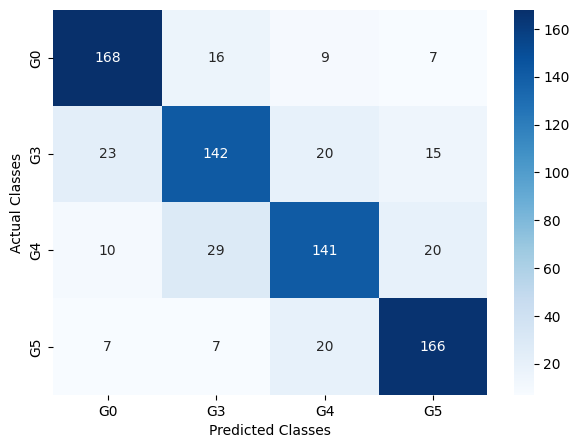

In [25]:
# Calcular la matriz de confusión
cm  = confusion_matrix(y_test, y_pred_MLP)

class_labels = ['G0','G3','G4','G5']

# Modificar tamaño de la figura y el eje
fig, ax = plt.subplots(figsize=(7, 5))  # Tamaño de 6x6 pulgadas

sns.heatmap(cm, fmt='d' , annot=True, cmap='Blues',xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Ajustar las etiquetas de los ejes
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

# Mostrar el gráfico
plt.show()

In [26]:
# Obtener el informe de clasificación
report = classification_report(y_test, y_pred_MLP, target_names= class_labels, digits=4)

print(report)

              precision    recall  f1-score   support

          G0     0.8077    0.8400    0.8235       200
          G3     0.7320    0.7100    0.7208       200
          G4     0.7421    0.7050    0.7231       200
          G5     0.7981    0.8300    0.8137       200

    accuracy                         0.7712       800
   macro avg     0.7700    0.7712    0.7703       800
weighted avg     0.7700    0.7712    0.7703       800



In [27]:
mlp_default_max_iter = MLPClassifier().max_iter
print(mlp_default_max_iter)

200


##Redes Comite

In [28]:
y_pred_com = np.vstack((y_pred_rf, y_pred_svm, y_pred_MLP))
y_pred_com = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_pred_com)
print(y_pred_com)

[0 3 3 3 0 4 4 5 3 0 5 4 5 5 3 0 3 5 4 0 0 0 0 5 0 5 0 3 0 3 4 0 0 3 3 4 4
 4 5 3 5 0 5 0 0 0 5 4 4 0 4 3 0 4 3 3 0 4 5 5 3 4 4 4 5 5 5 4 0 4 0 3 5 4
 3 0 5 0 0 0 3 0 5 3 4 3 5 4 0 0 3 3 3 4 0 3 5 4 3 4 4 5 0 0 5 0 3 5 5 3 4
 5 0 0 0 5 3 3 5 3 3 5 0 5 0 4 4 5 5 0 0 3 5 3 3 4 4 3 3 3 3 4 0 0 0 5 0 5
 4 0 0 4 5 0 3 5 0 4 0 4 3 3 4 3 5 5 4 5 4 5 4 5 5 0 3 4 3 5 5 3 5 3 5 3 3
 3 3 4 4 4 0 4 3 4 3 4 3 4 0 4 5 3 0 3 0 5 3 0 3 4 0 4 3 0 0 0 5 5 3 3 5 0
 4 3 4 0 5 3 0 0 5 4 0 3 3 5 3 4 5 5 5 3 4 0 0 3 0 3 0 3 0 4 3 3 5 5 5 5 5
 5 4 0 5 0 0 4 4 4 4 4 0 5 4 3 3 0 3 4 5 0 3 3 4 4 4 0 0 3 0 0 3 4 0 3 3 3
 4 5 0 4 0 4 4 5 0 3 5 5 3 5 5 5 3 0 3 0 0 5 5 4 0 4 0 5 3 0 0 0 0 5 3 3 4
 4 0 0 3 0 0 0 0 3 3 3 5 5 0 4 0 0 3 3 5 4 4 3 0 3 3 5 5 3 4 0 0 0 3 5 3 4
 5 5 0 3 4 4 5 0 5 4 3 3 5 4 0 0 0 0 5 5 5 4 0 5 5 3 3 4 5 5 0 3 5 4 4 0 4
 5 3 5 4 3 0 5 0 5 3 5 4 5 3 5 0 0 4 0 5 0 0 0 3 0 5 5 0 3 5 3 5 0 4 5 4 0
 3 5 5 4 5 5 0 5 0 3 4 0 0 5 0 5 0 4 0 5 5 3 4 3 3 0 5 0 4 5 0 3 0 5 4 4 0
 3 5 0 3 3 4 3 0 0 0 4 5 

In [29]:
# predicción en el conjunto de prueba
print("Precisión:", accuracy_score(y_test, y_pred_com))

Precisión: 0.7375


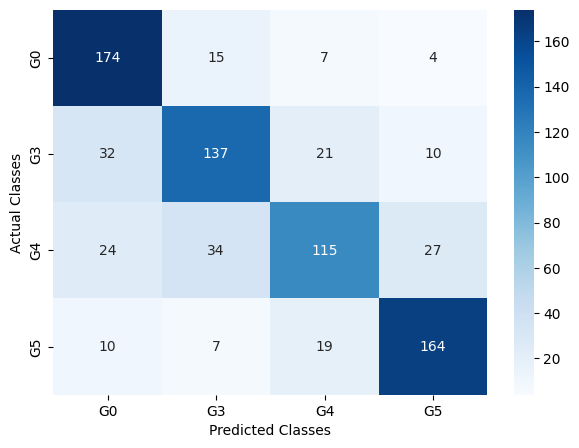

In [30]:
# Calcular la matriz de confusión
cm  = confusion_matrix(y_test, y_pred_com)

class_labels = ['G0','G3','G4','G5']

# Modificar tamaño de la figura y el eje
fig, ax = plt.subplots(figsize=(7, 5))  # Tamaño de 6x6 pulgadas

sns.heatmap(cm, fmt='d' , annot=True, cmap='Blues',xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Ajustar las etiquetas de los ejes
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

# Mostrar el gráfico
plt.show()

In [31]:
# Obtener el informe de clasificación
report = classification_report(y_test, y_pred_com, target_names= class_labels, digits=4)

print(report)

              precision    recall  f1-score   support

          G0     0.7250    0.8700    0.7909       200
          G3     0.7098    0.6850    0.6972       200
          G4     0.7099    0.5750    0.6354       200
          G5     0.8000    0.8200    0.8099       200

    accuracy                         0.7375       800
   macro avg     0.7362    0.7375    0.7333       800
weighted avg     0.7362    0.7375    0.7333       800

